In [3]:
import pybamm
import matplotlib.pyplot as plt
from models import MySPM

In [4]:
model = MySPM()

parameter_values = pybamm.ParameterValues("Chen2020")

v_min = parameter_values["Lower voltage cut-off [V]"]
v_max = parameter_values["Upper voltage cut-off [V]"]
experiment = pybamm.Experiment(
    [(f"Discharge at C/10 for 1 hour or until {v_min}V", "Rest for 1 hour")] * 10
    + [(f"Charge at C/10 for 1 hour or until {v_max}V", "Rest for 1 hour")] * 10,
)

In [5]:
sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)

sol = sim.solve(calc_esoh=False)

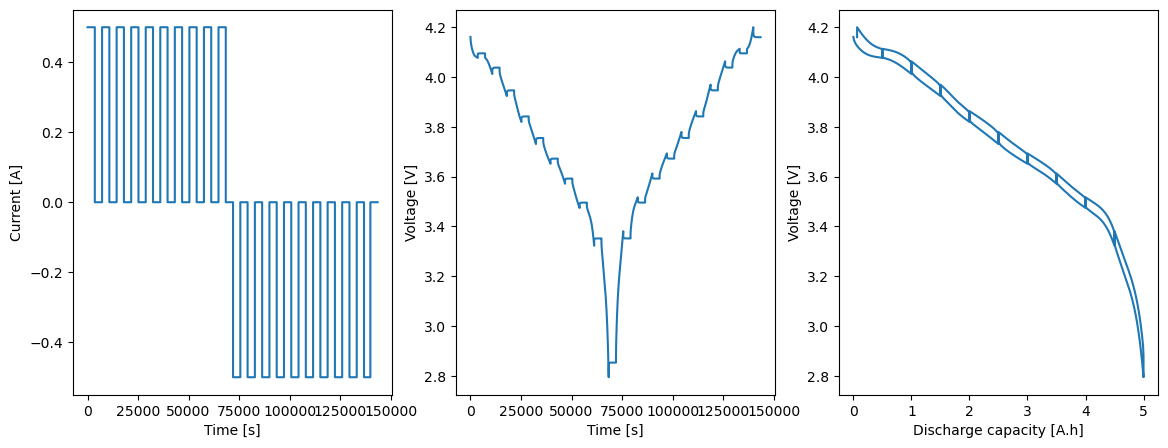

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
t = sol["Time [s]"].data
q = sol["Discharge capacity [A.h]"].data
I = sol["Current [A]"].data
V = sol["Voltage [V]"].data
ax[0].plot(t, I)
ax[1].plot(t, V)
ax[2].plot(q, V)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Current [A]")
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Voltage [V]")
ax[2].set_xlabel("Discharge capacity [A.h]")
ax[2].set_ylabel("Voltage [V]")
plt.show()
